# Projet sur les arbres de Grenoble

On reprend ce qu'on a fait les jours précédents mais avec pandas pour se simplifier la vie.

In [97]:
#coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path

In [2]:
data_path = Path.cwd().parent / 'data/ESP_PUBLIC.IDENTITE_ARBRE.csv'
print(data_path.exists())

True


In [3]:
raw_data = pd.read_csv(data_path)

Un petit peu d'exploration de données pour commencer.

In [4]:
raw_data.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,16750,ESP19318,ESP19318,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7394161255246..."
1,20142,ESP18095,ESP18095,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7397428849165..."
2,23843,ESP17861,ESP17861,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7393229609447..."
3,23841,ESP17860,ESP17860,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7410808202830..."
4,1778,ESP16403,ESP16403,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7408124079286..."


In [5]:
raw_data.describe()

,ELEM_POINT_ID,ADR_SECTEUR,EQUIPE,ANNEEDEPLANTATION,COURRIER,IDENTIFIANTPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE
count,31892.000000,31892.000000,0.0,31129.000000,0.0,604.000000,0.0,0.0,0.0,0.0
mean,18904.750784,3.860341,NaN,1989.208809,NaN,87.713576,NaN,NaN,NaN,NaN
std,11502.906146,1.697591,NaN,17.110732,NaN,60.484164,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1924.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9147.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,18361.500000,4.000000,NaN,1985.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,27620.250000,5.000000,NaN,2004.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,43866.000000,6.000000,NaN,2019.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [6]:
raw_data.columns

Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE',
       'GeoJSON'],
      dtype='object')

## Retour sur l'activité 1

In [7]:
annee_plantation = raw_data.ANNEEDEPLANTATION
#annee_plantation = raw_data['ANNEEDEPLANTATION']
annee_plantation[:10]

0    1975.0
1    1975.0
2    2001.0
3    1975.0
4    2006.0
5    1975.0
6    1975.0
7    1975.0
8    1975.0
9    2001.0
Name: ANNEEDEPLANTATION, dtype: float64

In [8]:
raw_data.ANNEEDEPLANTATION.value_counts()

1975.0    3783
2001.0    1606
1980.0    1511
1970.0    1391
2015.0    1028
          ... 
1944.0      27
1959.0      16
1924.0      12
2019.0       7
1964.0       6
Name: ANNEEDEPLANTATION, Length: 62, dtype: int64

In [9]:
annee_plantation.isna().any()

True

In [10]:
len(annee_plantation[annee_plantation.isna()])
#raw_data.ANNEEDEPLANTATION.isna().sum()

763

In [11]:
raw_data['ELEM_POINT_ID'].count()

31892

In [12]:
raw_data.ANNEEABATTAGE.value_counts()

Series([], Name: ANNEEABATTAGE, dtype: int64)

La donnee année d'abattage semble manquante pour tous les arbres. Je tente avec le fichier en ligne.

In [13]:
data_path2 = Path.cwd().parent / 'data/ESP_PUBLIC.IDENTITE_ARBRE_2.csv'
new_data = pd.read_csv(data_path2)
new_data.ANNEEABATTAGE.value_counts()

Series([], Name: ANNEEABATTAGE, dtype: int64)

In [14]:
raw_data.STADEDEDEVELOPPEMENT.value_counts()

Arbre adulte          22180
Arbre jeune            7110
Arbre vieillissant      221
Name: STADEDEDEVELOPPEMENT, dtype: int64

In [15]:
new_data.STADEDEDEVELOPPEMENT.value_counts()

Arbre adulte          22180
Arbre jeune            7110
Arbre vieillissant      221
Name: STADEDEDEVELOPPEMENT, dtype: int64

Moyenne des arbres planté chaque année

In [16]:
df = raw_data.groupby('ANNEEDEPLANTATION').count()
df['ELEM_POINT_ID']

ANNEEDEPLANTATION
1924.0      12
1944.0      27
1950.0     409
1955.0     118
1959.0      16
          ... 
2015.0    1028
2016.0     518
2017.0     638
2018.0     778
2019.0       7
Name: ELEM_POINT_ID, Length: 62, dtype: int64

In [17]:
df['ELEM_POINT_ID'].mean()

502.0806451612903

In [18]:
col_list = [
    'ELEM_POINT_ID',
    'GENRE_BOTA',
    'ESPECE',
    'ANNEEDEPLANTATION',
    'STADEDEDEVELOPPEMENT',
    'BIEN_REFERENCE'
]
# liste des colonnes intéressantes à afficher

In [19]:
annee_naissance = 1991
raw_data[col_list][raw_data.ANNEEDEPLANTATION == annee_naissance]
#raw_data['ANNEEDEPLANTAION'].value_counts()[annee_naissance]

,ELEM_POINT_ID,GENRE_BOTA,ESPECE,ANNEEDEPLANTATION,STADEDEDEVELOPPEMENT,BIEN_REFERENCE
4949,6527,Gleditsia,triacanthos,1991.0,Arbre adulte,AR29490
4951,2721,Gleditsia,triacanthos,1991.0,Arbre adulte,AR26758
4952,17715,Gleditsia,triacanthos,1991.0,Arbre adulte,AR25489
5196,28583,Gleditsia,triacanthos,1991.0,Arbre adulte,AR7911
7870,12354,Tilia,tomentosa,1991.0,Arbre adulte,AR30593
...,...,...,...,...,...,...
25982,9402,Liquidambar,styraciflua,1991.0,Arbre adulte,AR4960
25983,13206,Prunus,cerasifera,1991.0,Arbre adulte,AR4337
31037,15859,Fraxinus,excelsior,1991.0,Arbre adulte,AR23095
31122,8376,Fraxinus,excelsior,1991.0,Arbre adulte,AR13671


In [20]:
df = raw_data[col_list][raw_data.ANNEEDEPLANTATION > annee_naissance]
print(f'{df.ELEM_POINT_ID.count()} arbres ont été plantés depuis ma naissance.')

13393 arbres ont été plantés depuis ma naissance.


In [21]:
maire_mandat = [
    {'nom':'Mistral', 'deb':1919, 'fin':1932},
    {'nom':'Martin', 'deb':1932, 'fin':1935},
    {'nom':'Cocat', 'deb':1932, 'fin':1944},
    {'nom':'Lafleur', 'deb':1944, 'fin':1945},
    {'nom':'Martin', 'deb':1945, 'fin':1947},
    {'nom':'Bally', 'deb':1947, 'fin':1948},
    {'nom':'Perinetti', 'deb':1948, 'fin':1949},
    {'nom':'Martin', 'deb':1949, 'fin':1959},
    {'nom':'Michallon', 'deb':1959, 'fin':1965},
    {'nom':'Dubedout', 'deb':1965, 'fin':1983},
    {'nom':'Carignon', 'deb':1983, 'fin':1995},
    {'nom':'Destot', 'deb':1995, 'fin':2014},
    {'nom':'Piolle', 'deb':2014, 'fin':2020}
    ] # liste des maires de Grenoble depuis 1919 avec les années de début et de fin de mandat

In [22]:
annee_maire = pd.DataFrame(columns=['ANNEE','MAIRE'])
for dic in maire_mandat :
    for ann in range(dic['deb'],dic['fin']) :
        annee_maire = annee_maire.append({'ANNEE':ann, 'MAIRE':dic['nom']},ignore_index=True)

In [23]:
annee_maire

,ANNEE,MAIRE
0,1919,Mistral
1,1920,Mistral
2,1921,Mistral
3,1922,Mistral
4,1923,Mistral
...,...,...
99,2015,Piolle
100,2016,Piolle
101,2017,Piolle
102,2018,Piolle


In [24]:
pd.merge(raw_data,annee_maire, left_on='ANNEEDEPLANTATION',right_on='ANNEE')['MAIRE'].value_counts()

Dubedout     12466
Destot        8882
Carignon      4612
Piolle        3871
Michallon      732
Martin         527
Lafleur         27
Mistral         12
Name: MAIRE, dtype: int64

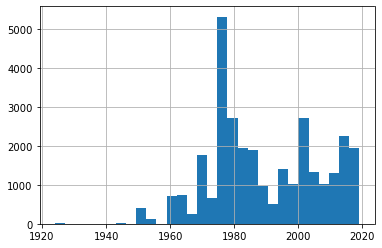

In [25]:
raw_data['ANNEEDEPLANTATION'].hist(bins=30)

In [26]:
raw_data['GENRE_BOTA'].isna().sum()

438

Comparaison avec le fichier corrompu

In [27]:
data_path3 = Path.cwd().parent / 'data/ESP_PUBLIC.IDENTITE_ARBRE_CORRPUTED.csv'
cor_data = pd.read_csv(data_path3)

/home/student-05/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
true_data = cor_data.copy()
mask = cor_data != raw_data
mask2 = cor_data.eq(raw_data)
#print(mask)
#print((mask == ~mask2).all())

In [29]:
raw_data.dtypes == cor_data.dtypes

ELEM_POINT_ID             True
CODE                      True
NOM                       True
GENRE                     True
GENRE_DESC                True
CATEGORIE                 True
CATEGORIE_DESC            True
SOUS_CATEGORIE            True
SOUS_CATEGORIE_DESC       True
CODE_PARENT               True
CODE_PARENT_DESC          True
ADR_SECTEUR               True
BIEN_REFERENCE            True
GENRE_BOTA                True
ESPECE                    True
VARIETE                   True
STADEDEDEVELOPPEMENT      True
EQUIPE                    True
REMARQUES                 True
ANNEEDEPLANTATION        False
RAISONDEPLANTATION        True
TRAITEMENTCHENILLES       True
COURRIER                  True
IDENTIFIANTPLU            True
TYPEIMPLANTATIONPLU       True
INTITULEPROTECTIONPLU     True
ANNEEABATTAGE             True
ESSOUCHEMENT              True
DIAMETREARBRE             True
CAUSEABATTAGE             True
COLLECTIVITE              True
GeoJSON                   True
dtype: b

In [30]:
#Ma solution mais qui semble ne pas fonctionner
true_data[mask] = np.nan
true_data = true_data.astype(raw_data.dtypes)
print(true_data.dtypes == raw_data.dtypes)
true_data[mask] = raw_data[mask]

#true_data = true_data.astype(raw_data.dtypes,errors='ignore')
#true_data = true_data.astype(raw_data.dtypes)
#true_data.convert_dtypes().dtypes
#combine_first

ELEM_POINT_ID            True
CODE                     True
NOM                      True
GENRE                    True
GENRE_DESC               True
CATEGORIE                True
CATEGORIE_DESC           True
SOUS_CATEGORIE           True
SOUS_CATEGORIE_DESC      True
CODE_PARENT              True
CODE_PARENT_DESC         True
ADR_SECTEUR              True
BIEN_REFERENCE           True
GENRE_BOTA               True
ESPECE                   True
VARIETE                  True
STADEDEDEVELOPPEMENT     True
EQUIPE                   True
REMARQUES                True
ANNEEDEPLANTATION        True
RAISONDEPLANTATION       True
TRAITEMENTCHENILLES      True
COURRIER                 True
IDENTIFIANTPLU           True
TYPEIMPLANTATIONPLU      True
INTITULEPROTECTIONPLU    True
ANNEEABATTAGE            True
ESSOUCHEMENT             True
DIAMETREARBRE            True
CAUSEABATTAGE            True
COLLECTIVITE             True
GeoJSON                  True
dtype: bool


TypeError: Cannot do inplace boolean setting on mixed-types with a non np.nan value

In [31]:
#La solution de Gaétan, enfin pas complètement mais ça devrait marcher mais ça marche pas
mask = cor_data != raw_data
true_data[mask] = np.nan
true_data = true_data.astype(raw_data.dtypes)
true_data = true_data.combine_first(raw_data)
#true_data[mask] = raw_data[mask]
#print((true_data == raw_data).all())

In [32]:
true_data.dtypes == raw_data.dtypes

ELEM_POINT_ID            True
CODE                     True
NOM                      True
GENRE                    True
GENRE_DESC               True
CATEGORIE                True
CATEGORIE_DESC           True
SOUS_CATEGORIE           True
SOUS_CATEGORIE_DESC      True
CODE_PARENT              True
CODE_PARENT_DESC         True
ADR_SECTEUR              True
BIEN_REFERENCE           True
GENRE_BOTA               True
ESPECE                   True
VARIETE                  True
STADEDEDEVELOPPEMENT     True
EQUIPE                   True
REMARQUES                True
ANNEEDEPLANTATION        True
RAISONDEPLANTATION       True
TRAITEMENTCHENILLES      True
COURRIER                 True
IDENTIFIANTPLU           True
TYPEIMPLANTATIONPLU      True
INTITULEPROTECTIONPLU    True
ANNEEABATTAGE            True
ESSOUCHEMENT             True
DIAMETREARBRE            True
CAUSEABATTAGE            True
COLLECTIVITE             True
GeoJSON                  True
dtype: bool

In [33]:
true_data[mask] = np.nan #raw_data[mask]

In [34]:
df1 = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]})
df2 = pd.DataFrame({'A':[1,2,3], 'B':[4,0,6], 'C':[0,8,9]})
msk = df1!=df2
print(msk)
print(df1[msk])
df2[msk] = df1[msk]
print(df2)

       A      B      C
0  False  False   True
1  False   True  False
2  False  False  False
    A    B    C
0 NaN  NaN  7.0
1 NaN  5.0  NaN
2 NaN  NaN  NaN
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


## Retour sur l'activité 2

In [35]:
print(raw_data['GENRE_BOTA'].unique())
print(f"Il y a {len(raw_data['GENRE_BOTA'].unique())} genres botaniques de représentés.")
df_genre = raw_data.groupby(['GENRE_BOTA']).count()

['Acer' 'Fraxinus' 'Carpinus' 'Alnus' 'Robinia' 'Populus' 'Ulmus' 'Pinus'
 'Sambucus' 'Salix' 'Picea' 'Tilia' 'Quercus' 'Prunus' 'Platanus'
 'Liquidambar' 'Koelreuteria' 'Gleditsia' 'Cupressus' 'Thuja' 'Betula'
 'Halesia' 'Crataegus' 'Cedrus' 'Morus' 'Aesculus' 'Liriodendron' 'Ptelea'
 nan 'Celtis' 'Chionanthus' 'Paulownia' 'Pistacia' 'Tetradium' 'Pyrus'
 'Cotinus' 'Zelkova' 'Parrotia' 'Sophora' 'Fagus' 'Mespilus'
 'Phellodendron' 'Malus' 'Amélanchier' 'Taxodium' 'Ilex' 'Taxus' 'Cercis'
 'Pterocarya' 'Diospyros' 'Catalpa' 'Chamaecyparis' 'Rhus' 'Cedrela'
 'Gymnocladus' 'Corylus' 'Pteroceltis' 'Magnolia' 'Sequoia'
 'Cupressocyparis' 'Metasequoia' 'Albizia' 'Sequoiadendron' 'Sorbus'
 'Cephalotaxus' 'Lagerstroemia' 'Ostrya' 'Buxus' 'Cercidiphyllum'
 'Maclura' 'Chitalpa' 'Juniperus' 'Sorbopyrus' 'Juglans' 'Poncinos'
 'Davidia' 'Ginkgo' 'Libocedrus' 'Abies' 'Sciadopitys' 'Cladastris'
 'Broussonetia' 'Calocedrus' 'Ficus' 'Punica' 'Castanea' 'Cornus'
 'Cydonia' 'Idesia' 'Laurus' 'Euodia' 'Hov

In [36]:
df_espece = raw_data.groupby(['GENRE_BOTA','ESPECE']).count()
print(df_espece.index)
print(f"Il y a {len(df_espece.index)} especes différentes.")

MultiIndex([(  'Abies',          'alba'),
            (  'Abies',      'concolor'),
            (  'Abies',       'koreana'),
            (  'Abies',  'nordmanniana'),
            (  'Abies',       'pinsapo'),
            ( 'Acacia',      'dealbata'),
            (   'Acer',  'buergerianum'),
            (   'Acer',     'campestre'),
            (   'Acer',  'cappadocicum'),
            (   'Acer', 'carpinifolium'),
            ...
            (  'Ulmus',     'campestre'),
            (  'Ulmus',    'campestris'),
            (  'Ulmus',  'carpinifolia'),
            (  'Ulmus',        'glabra'),
            (  'Ulmus',        'laevis'),
            (  'Ulmus',         'minor'),
            (  'Ulmus',    'parvifolia'),
            (  'Ulmus',       'resista'),
            ('Zelkova',       'crenata'),
            ('Zelkova',       'serrata')],
           names=['GENRE_BOTA', 'ESPECE'], length=339)
Il y a 339 especes différentes.


In [37]:
df_espece.loc['Ulmus','campestre']

ELEM_POINT_ID            1
CODE                     1
NOM                      1
GENRE                    1
GENRE_DESC               1
CATEGORIE                1
CATEGORIE_DESC           1
SOUS_CATEGORIE           1
SOUS_CATEGORIE_DESC      1
CODE_PARENT              1
CODE_PARENT_DESC         1
ADR_SECTEUR              1
BIEN_REFERENCE           1
VARIETE                  0
STADEDEDEVELOPPEMENT     1
EQUIPE                   0
REMARQUES                0
ANNEEDEPLANTATION        1
RAISONDEPLANTATION       0
TRAITEMENTCHENILLES      0
COURRIER                 0
IDENTIFIANTPLU           0
TYPEIMPLANTATIONPLU      0
INTITULEPROTECTIONPLU    0
ANNEEABATTAGE            0
ESSOUCHEMENT             0
DIAMETREARBRE            0
CAUSEABATTAGE            0
COLLECTIVITE             1
GeoJSON                  1
Name: (Ulmus, campestre), dtype: int64

In [38]:
df_genre['ELEM_POINT_ID'][df_genre['ELEM_POINT_ID']==df_genre['ELEM_POINT_ID'].max()]

GENRE_BOTA
Acer    5260
Name: ELEM_POINT_ID, dtype: int64

In [39]:
df_espece['ELEM_POINT_ID'][df_espece['ELEM_POINT_ID']==df_espece['ELEM_POINT_ID'].max()]

GENRE_BOTA  ESPECE    
Platanus    acerifolia    4008
Name: ELEM_POINT_ID, dtype: int64

In [40]:
df_genre['ELEM_POINT_ID'][df_genre['ELEM_POINT_ID']==1]

GENRE_BOTA
Acacia         1
Castanea       1
Eucalyptus     1
Laurus         1
Nyssa          1
Poncinos       1
Pseudotsuga    1
Rhamnus        1
Sciadopitys    1
Sorbopyrus     1
Staphylea      1
Sterculia      1
Name: ELEM_POINT_ID, dtype: int64

In [41]:
df_espece['ELEM_POINT_ID'][df_espece['ELEM_POINT_ID']==1]

GENRE_BOTA      ESPECE        
Abies           alba              1
                koreana           1
Acacia          dealbata          1
Acer            hippocastanum     1
                macrophyllum      1
                opalus            1
                zoeschense        1
Castanea        sativa            1
Cedrela         sinense           1
Celtis          orientalis        1
Chamaecyparis   formosensis       1
                pisifera          1
Cladastris      kentukea          1
Crataegus       prunifolia        1
Cydonia         vulgaris          1
Eucalyptus      gunii             1
Fraxinus        quadrangulata     1
Halesia         monticola         1
Juniperus       drupacea          1
                virginiana        1
Laurus          nobilis           1
Magnolia        heptapeta         1
                liliflora         1
Malus           avium             1
                cerasifera        1
                denboerii         1
                excelsior        

La question sur la diversification est laissée à plus tard, je vais regarder la solution proposée hier.

In [42]:
yr_genre = raw_data[["ANNEEDEPLANTATION","GENRE_BOTA","ELEM_POINT_ID"]].groupby(["ANNEEDEPLANTATION","GENRE_BOTA"]).count()
yr_genre.sort_values(["ANNEEDEPLANTATION","ELEM_POINT_ID"],ascending=[True,False])

ELEM_POINT_ID
ANNEEDEPLANTATION GENRE_BOTA                  
1924.0            Crataegus                  3
                  Prunus                     2
                  Betula                     1
                  Chamaecyparis              1
                  Diospyros                  1
...                                        ...
2019.0            Acer                       1
                  Alnus                      1
                  Euodia                     1
                  Koelreuteria               1
                  Magnolia                   1

[1815 rows x 1 columns]

In [43]:
yr_genre.loc[2019]

,ELEM_POINT_ID
GENRE_BOTA,
Acer,1
Alnus,1
Euodia,1
Koelreuteria,1
Magnolia,1
Prunus,2


In [44]:
#pour dépiler les valeurs et les mettre dans des nouvelles colonnes
yr_genre.unstack(fill_value=0)

ELEM_POINT_ID                                               \
GENRE_BOTA               Betula Chamaecyparis Crataegus Diospyros Fagus Ilex   
ANNEEDEPLANTATION                                                              
1924.0                        1             1         3         1     1    1   
1944.0                        0             0         0         0     0    0   
1950.0                        0             0         0         0     0    0   
1955.0                        0             0         0         0    15    0   
1959.0                        0             0         0         0     0    0   
...                         ...           ...       ...       ...   ...  ...   
2015.0                       11             0        19         2     0    3   
2016.0                        1             0         6         1     3    0   
2017.0                        6             3         4         3     4    3   
2018.0                        3             0         6         5    14    2   
2019.0                        0             0         0         0     0    0   

                                             ...                          \
GENRE_BOTA        Olea Picea Prunus Populus  ... Pteroceltis Pterostyrax   
ANNEEDEPLANTATION                            ...                           
1924.0               1     1      2       0  ...           0           0   
1944.0               0     0      0      27  ...           0           0   
1950.0               0     0      1       0  ...           0           0   
1955.0               0     0      1       0  ...           0           0   
1959.0               0     0      0       0  ...           0           0   
...                ...   ...    ...     ...  ...         ...         ...   
2015.0               0     0    129       0  ...          10           3   
2016.0               0     0     36      12  ...           0           0   
2017.0               1     1     68       0  ...           0           0   
2018.0               1     0    120       0  ...           2           0   
2019.0               0     0      2       0  ...           0           0   

                                                                                
GENRE_BOTA        Staphylea Rhamnus Styrax Acacia Carya Euodia Hibiscus Idesia  
ANNEEDEPLANTATION                                                               
1924.0                    0       0      0      0     0      0        0      0  
1944.0                    0       0      0      0     0      0        0      0  
1950.0                    0       0      0      0     0      0        0      0  
1955.0                    0       0      0      0     0      0        0      0  
1959.0                    0       0      0      0     0      0        0      0  
...                     ...     ...    ...    ...   ...    ...      ...    ...  
2015.0                    0       1      3      0     0      0        0      0  
2016.0                    0       0      0      0     0      0        0      0  
2017.0                    0       0      0      0     0      0        0      0  
2018.0                    0       0      0      1     3      1        3      5  
2019.0                    0       0      0      0     0      1        0      0  

[62 rows x 118 columns]

In [45]:
#le cumsum fait une somme cumulative des valeurs
#utile ici car pas d'arbres arrachés
yr_genre.unstack(fill_value=0).cumsum()

ELEM_POINT_ID                                               \
GENRE_BOTA               Betula Chamaecyparis Crataegus Diospyros Fagus Ilex   
ANNEEDEPLANTATION                                                              
1924.0                        1             1         3         1     1    1   
1944.0                        1             1         3         1     1    1   
1950.0                        1             1         3         1     1    1   
1955.0                        1             1         3         1    16    1   
1959.0                        1             1         3         1    16    1   
...                         ...           ...       ...       ...   ...  ...   
2015.0                     1191           362        99        14   252   25   
2016.0                     1192           362       105        15   255   25   
2017.0                     1198           365       109        18   259   28   
2018.0                     1201           365       115        23   273   30   
2019.0                     1201           365       115        23   273   30   

                                             ...                          \
GENRE_BOTA        Olea Picea Prunus Populus  ... Pteroceltis Pterostyrax   
ANNEEDEPLANTATION                            ...                           
1924.0               1     1      2       0  ...           0           0   
1944.0               1     1      2      27  ...           0           0   
1950.0               1     1      3      27  ...           0           0   
1955.0               1     1      4      27  ...           0           0   
1959.0               1     1      4      27  ...           0           0   
...                ...   ...    ...     ...  ...         ...         ...   
2015.0               5   229    933     888  ...          13           6   
2016.0               5   229    969     900  ...          13           6   
2017.0               6   230   1037     900  ...          13           6   
2018.0               7   230   1157     900  ...          15           6   
2019.0               7   230   1159     900  ...          15           6   

                                                                                
GENRE_BOTA        Staphylea Rhamnus Styrax Acacia Carya Euodia Hibiscus Idesia  
ANNEEDEPLANTATION                                                               
1924.0                    0       0      0      0     0      0        0      0  
1944.0                    0       0      0      0     0      0        0      0  
1950.0                    0       0      0      0     0      0        0      0  
1955.0                    0       0      0      0     0      0        0      0  
1959.0                    0       0      0      0     0      0        0      0  
...                     ...     ...    ...    ...   ...    ...      ...    ...  
2015.0                    1       1      3      0     0      0        0      0  
2016.0                    1       1      3      0     0      0        0      0  
2017.0                    1       1      3      0     0      0        0      0  
2018.0                    1       1      3      1     3      1        3      5  
2019.0                    1       1      3      1     3      2        3      5  

[62 rows x 118 columns]

In [46]:
df = yr_genre.unstack(fill_value=0).cumsum()

In [47]:
# on ajoute une colonne "Total" pour avoir le nombre total d'arbres
df['Total'] = df.sum(axis=1)

In [48]:
df['Genre_max'] = df['ELEM_POINT_ID'].idxmax(axis=1)
df['Genre_max_prop'] = df['ELEM_POINT_ID'].max(axis=1)/df['Total']*100

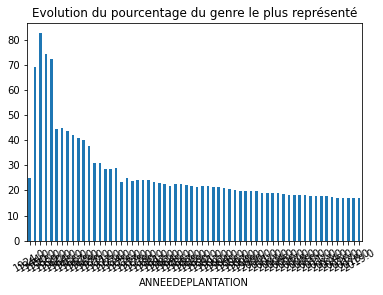

In [49]:
df['Genre_max_prop'].plot.bar(title='Evolution du pourcentage du genre le plus représenté',rot=30)

In [64]:
yr_espece = raw_data.value_counts(["ANNEEDEPLANTATION","GENRE_BOTA","ESPECE"])

In [65]:
yr_espece = yr_espece.unstack(level=["GENRE_BOTA","ESPECE"],fill_value=0).cumsum()

In [68]:
yr_espece.columns

MultiIndex([(       'Platanus',     'acerifolia'),
            (           'Acer',      'campestre'),
            (           'Acer',    'platanoides'),
            (           'Acer', 'pseudoplatanus'),
            (          'Pinus',          'nigra'),
            (       'Carpinus',        'betulus'),
            (         'Betula',         'utilis'),
            (       'Fraxinus',      'excelsior'),
            (    'Liquidambar',    'styraciflua'),
            (          'Tilia',      'tomentosa'),
            ...
            (    'Eriobotrya ',       'japonica'),
            (    'Pseudotsuga',      'menziesii'),
            (       'Aesculus',     'parviflora'),
            (          'Abies',           'alba'),
            (       'Fraxinus',  'quadrangulata'),
            (      'Sterculia',        'foetida'),
            (       'Castanea',         'sativa'),
            (          'Total',               ''),
            (     'Espece_max',               ''),
            ('E

In [74]:
yr_espece['Total'] = yr_espece.iloc[:,0:337].sum(axis=1) 
# on precise les colonnes pour que le maximum porte sur les bonnes colonnes
yr_espece['Espece_max'] = yr_espece.iloc[:,0:337].idxmax(axis=1)
yr_espece['Espece_max_prop'] = yr_espece.iloc[:,0:337].max(axis=1)/df['Total']*100
yr_espece

GENRE_BOTA          Platanus      Acer                            Pinus  \
ESPECE            acerifolia campestre platanoides pseudoplatanus nigra   
ANNEEDEPLANTATION                                                         
1924.0                     0         0           0              0     0   
1944.0                     0         0           0              0     0   
1950.0                   367         0           0              0     0   
1955.0                   414         0           0              0     0   
1959.0                   414         0           0              0     0   
...                      ...       ...         ...            ...   ...   
2015.0                  3965       850        1067           1330  1296   
2016.0                  3970       862        1077           1332  1296   
2017.0                  3972       872        1092           1333  1299   
2018.0                  3973       899        1097           1334  1299   
2019.0                  3973       899        1097           1334  1299   

GENRE_BOTA        Carpinus Betula  Fraxinus Liquidambar     Tilia  ...  \
ESPECE             betulus utilis excelsior styraciflua tomentosa  ...   
ANNEEDEPLANTATION                                                  ...   
1924.0                   0      0         0           0         0  ...   
1944.0                   0      0         0           0         0  ...   
1950.0                   0      0         0           0         0  ...   
1955.0                   0      0         1           0        41  ...   
1959.0                   0      0         1           0        57  ...   
...                    ...    ...       ...         ...       ...  ...   
2015.0                1215    358       760         791       963  ...   
2016.0                1225    359       760         791       963  ...   
2017.0                1228    360       775         793       966  ...   
2018.0                1274    363       782         800       968  ...   
2019.0                1274    363       782         800       968  ...   

GENRE_BOTA        Eriobotrya  Pseudotsuga   Aesculus Abies      Fraxinus  \
ESPECE               japonica   menziesii parviflora  alba quadrangulata   
ANNEEDEPLANTATION                                                          
1924.0                      0           0          0     0             0   
1944.0                      0           0          0     0             0   
1950.0                      0           0          0     0             0   
1955.0                      0           0          0     0             0   
1959.0                      0           0          0     0             0   
...                       ...         ...        ...   ...           ...   
2015.0                      3           1          2     1             1   
2016.0                      3           1          2     1             1   
2017.0                      3           1          2     1             1   
2018.0                      3           1          2     1             1   
2019.0                      3           1          2     1             1   

GENRE_BOTA        Sterculia Castanea  Total              Espece_max  \
ESPECE              foetida   sativa                                  
ANNEEDEPLANTATION                                                     
1924.0                    0        0      9    (Prunus, lusitanica)   
1944.0                    0        0     36        (Populus, nigra)   
1950.0                    0        0    445  (Platanus, acerifolia)   
1955.0                    0        0    563  (Platanus, acerifolia)   
1959.0                    0        0    579  (Platanus, acerifolia)   
...                     ...      ...    ...                     ...   
2015.0                    1        1  27868  (Platanus, acerifolia)   
2016.0                    1        1  28241  (Platanus, acerifolia)   
2017.0                    1        1  28740  (Platanus, acerifolia

In [1]:
fig, ax = plt.subplots()
fig = plt.bar(yr_espece.index, yr_espece["Espece_max_prop"])
ax.set_xlabel('Année')
ax.set_ylabel('Pourcentage')
ax.set_title("Evolution du pourcentage de l'espece la plus représentée")
ax.tick_params(labelrotation=30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

NameError: name 'plt' is not defined

## Estimation de la durée de vie des arbres

In [ ]:
df = raw_data[['ANNEEDEPLANTATION','STADEDEDEVELOPPEMENT']].groupby('STADEDEDEVELOPPEMENT').mean()

In [ ]:
df.apply(lambda x: 2020 - x)

Ces ages moyens sont cohérents avec les sources données : les arbres adultes ont entre 30 et 80 ans, et les arbres vieillissant sont autour de 50 ans.

## Travail sur les espèces désirées

In [ ]:
df_genre['ELEM_POINT_ID']

In [ ]:
'Catalpa' in df_genre.index

In [ ]:
df_espece.index[100:200]

In [ ]:
espece_non_desire = [
    ('Acer', 'saccharinum'),
    ('Albizia', 'julibrissin'),
    ( 'Catalpa',  'bignonoides'),
    (     'Ginkgo',       'biloba'),
    ('Gymnocladus',      'dioicus'),
    ( 'Koelreuteria',   'paniculata'),
    (     'Laburnum',  'anagyroides'),
    (    'Paulownia',    'tomentosa'),
    (       'Sophora',       'japonica'),
    (   'Acer',    'platanoides'),
    (   'Acer', 'pseudoplatanus'),
    (      'Betula',      'pendula'),
    (      'Betula',       'utilis'),
    (    'Cryptomeria',     'japonica'),
    (        'Davidia',  'involucrata'),
    (      'Fagus',     'sylvatica'),
    (     'Juglans',        'nigra'),
    ('Liriodendron',     'tulipifera'),
    (    'Magnolia',    'grandiflora'),
    (    'Picea',        'abies'),
    ( 'Populus',         'alba'),
    (       'Quercus',        'bicolor'),
    (       'Quercus',     'macrocarpa'),
    (       'Quercus',          'rubra'),
    (         'Salix',           'alba'),
    (        'Sorbus',      'aucuparia'),
    (      'Aesculus',          'carnea'),
    (      'Aesculus', 'chandelle seche'),
    (      'Aesculus',   'hippocastanum'),
    (      'Aesculus',      'parviflora'),
    (      'Aesculus',           'pavia'),
    (       'Fraxinus',        'americana'),
    (       'Fraxinus',     'angustifolia'),
    (       'Fraxinus',        'excelsior'),
    (       'Fraxinus',      'mandshurica'),
    (       'Fraxinus',         'mariesii'),
    (       'Fraxinus',            'ornus'),
    (       'Fraxinus',         'oxycarpa'),
    (       'Fraxinus',    'pennsylvanica'),
    (       'Fraxinus',    'quadrangulata'),
    (       'Fraxinus',      'sieboldiana'),
    (       'Fraxinus',         'velutina'),
    (      'Platanus',     'acerifolia'),
    (      'Platanus',      'hispanica'),
    (      'Platanus',     'orientalis'),
    (      'Platanus',       'platanor'),
    (     'Ailanthus',       'altissima'),
    (       'Robinia',   'pseudoacacia'),
    (          'Acer',         'negundo'),
    (      'Platanus',     'acerifolia'),
    (        'Betula',            'alba'),
    (        'Betula',           'nigra'),
    (        'Betula',      'papyrifera'),
    (        'Betula',         'pendula'),
    (        'Betula',          'utilis'),
    (        'Betula',       'verrucosa'),
    (      'Castanea',          'sativa'),
    (      'Cupressus',        'arizonica'),
    (      'Cupressus',     'nootkatensis'),
    (      'Cupressus',     'sempervirens'),
    (       'Fraxinus',        'americana'),
    (       'Fraxinus',     'angustifolia'),
    (       'Fraxinus',        'excelsior'),
    (       'Fraxinus',      'mandshurica'),
    (       'Fraxinus',         'mariesii'),
    (       'Fraxinus',            'ornus'),
    (       'Fraxinus',         'oxycarpa'),
    (       'Fraxinus',    'pennsylvanica'),
    (       'Fraxinus',    'quadrangulata'),
    (       'Fraxinus',      'sieboldiana'),
    (       'Fraxinus',         'velutina'),
    (           'Olea',         'europaea')
]
espece_non_desire = list(set(espece_non_desire))

In [ ]:
print(pd.__version__)